<a href="https://colab.research.google.com/github/CaroSerrano/FundamentosDeLaCienciaDeDatos/blob/main/vivoLimpieza_de_datos_con_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Limpiando y preparando de datos con Pandas
La limpieza de datos es una tarea crucial en el proceso de análisis. Si los datos no están limpios, los resultados del análisis pueden ser inexactos y llevar a decisiones equivocadas.

Pasos para la limpieza de datos:
* Identificar y eliminar valores atípicos o valores faltantes
* Eliminar datos duplicados, no útiles o redundantes
* Convertir los datos en el formato adecuado
* Normalizar los datos (1)
* Verificar la consistencia de los datos (2)
* Verificar la validez de los datos


(1) La normalización de datos es un proceso de organización y estructuración de una base de datos para reducir la redundancia de datos. Este proceso es una forma de asegurarse de que cada campo y registro esté organizado de forma lógica, de modo que no sólo se evita la redundancia, sino que también se hace más eficiente el uso de cualquier base de datos relacional: se evita cualquier error de entrada de datos, el borrado accidental y también se facilita el proceso de actualización de los datos.

(2) La consistencia de los datos significa que los datos en todas las bases de datos que tenemos a disposición están sincronizados entre sí en las diversas fuentes a las que se acude. Si los datos se replican en varias fuentes, deben ser coherentes en todas las instancias

###Ejemplos de algunas prácticas comunes
* Conversión de formatos de fecha:  
  `df['column'] = pd.to_datetime(df['column'], format ='%d/%m/%Y')`
* Conversión de cadenas de texto a datos numéricos:   
  `df['column'] = pd.to_numeric(df['column'], errors = 'coerce')`
* Conversión a str:  
`df['column'] = df['column'].astype(str)`
* Eliminar espacios al principio y al final de un string:   
  `df['column'] = df['column'].str.strip()`
* Llenado de faltantes:   
  `df['column'] = df['column'].fillna(df['column'].mean(), inplace = True)`  
  `df['column'] = df['column'].fillna()`
* Eliminar filas que no tengan un valor:   
  `df = df.dropna(subset=["column"]) # elimina las filas que no tienen los valores de la columna indicada`   
  `df = df.dropna() # elimina las filas a las que le falta algún valor`  
  `df = df.dropna(how='all') # elimina las filas con todos los valores faltantes`   
  `df = df.dropna(thresh=2) # elimina las filas con 2 o más valores faltantes`
* Reemplazar/Eliminar caracteres:   
  `df['column'] = df['column'].str.replace('valor_actual_1','valor_nuevo_1').str.replace('valor_actual_2','valor_nuevo_2')`  
  `df['column'] = df['column'].str.replace('caracter_actual_1','caracter_nuevo_1').str.replace('caracter_actual_2','caracter_actual_2')`
* Eliminar columnas innecesarias o redundantes:  
  `df = df.drop(columns = ['column_1', 'column_2'], inplace = True)`  
  `df = df.drop(['column'], axis = 1)`
* Eliminar filas por índice:   
  `df = df.drop(index=('index_1', 'index_1'))`
* Eliminar filas  y columnas innecesarias:  
  `df = df.drop(index='index', columns='column')`
* Extraer una columna para poder utilizarla después:  
  `serie_column = df.pop('column')`
* Agregar una columna por indexación:   
  `df2 = df.join('column')`
* Renombrar columnas:   
  `df = df.rename(columns={'column_actual_1':'column_nueva_1'})`
* Duplicados contarlos:   
  `df.duplicated().sum()`   
* Duplicados mostrarlos:   
  `df[df.duplicated(kepp='First'/'last'/False)]`
* Duplicados borrarlos:   
  `df.drop_duplicates()`
* Controles:
  `.isnull()`
  `.notnull()`
  `.isna()`
  `.notna()`
* Slice por indices de números:   
  `.iloc[]`
* Slice por indices de texto (si hubiese):   
  `.loc[]`




# Recordatorio métodos pandas

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import display as ds

* Creando dataframe ejemplos a partir de un arreglo numpy  
`df= pd.DataFrame(data=array_numpy, index=array_numpy, columns=array_numpy)`

In [ ]:
datos = np.array([['','Nombre','Apellido','Tel', 'DNI'],['Administrador','Armando','Gómez', '2536-5225','23547852'],['Ayudante','Raúl','Martínez',['3025-6458', '3025-4584'],'32568456'], ['Visitante','Josefina','Alvarez', '2856-9874','35821454']], dtype=object)
df_nparray = pd.DataFrame(data=datos[1:,1:], columns=datos[0,1:], index=datos[1:,0])
df_nparray

,Nombre,Apellido,Tel,DNI
Administrador,Armando,Gómez,2536-5225,23547852
Ayudante,Raúl,Martínez,"[3025-6458, 3025-4584]",32568456
Visitante,Josefina,Alvarez,2856-9874,35821454


* Creando dataframe ejemplos a partir de un diccionario
`df= pd.DataFrame(data=dict_py)`

In [ ]:
correos_dict = {'DNI': [ '32568456','23547852', '35821454'],'email': [ 'rmarti1969@yahoo.com','agomez@gmail.com', 'joa@outlook.com']}
df_dictpy = pd.DataFrame(correos_dict)
df_dictpy

,DNI,email
0,32568456,rmarti1969@yahoo.com
1,23547852,agomez@gmail.com
2,35821454,joa@outlook.com


* Agregado de nuevas columnas al Dataframe utilizando una función que busca correspondencias entre dos elementos y apunta a su valor: `map()`

In [ ]:
residencia_dict = {'35821454':'Unquillo', '23547852':'Rosario', '32568456':'Trenque Launquen'}
df_nparray['ciudad'] = df_nparray.DNI.map(residencia_dict)
df_nparray

,Nombre,Apellido,Tel,DNI,ciudad
Administrador,Armando,Gómez,2536-5225,23547852,Rosario
Ayudante,Raúl,Martínez,"[3025-6458, 3025-4584]",32568456,Trenque Launquen
Visitante,Josefina,Alvarez,2856-9874,35821454,Unquillo


* Denormalización (Expansión de columna) un dataframe a partir de los valores de una columna:  
  `df = df.explode('Column', ignore_index =True/False)`

In [ ]:
df_explode = df_nparray.explode('Tel')
df_explode

,Nombre,Apellido,Tel,DNI,ciudad
Administrador,Armando,Gómez,2536-5225,23547852,Rosario
Ayudante,Raúl,Martínez,3025-6458,32568456,Trenque Launquen
Ayudante,Raúl,Martínez,3025-4584,32568456,Trenque Launquen
Visitante,Josefina,Alvarez,2856-9874,35821454,Unquillo


* Unión de dos DataFrames (merge):  
  `df3 = df1.merge(df2, on='column_PK', how='inner')`

* Unión de dos DataFrames (concat):  
  `df3 = pd.concat([df1,df2], axis='column/row', join='inner')`

Expresiones lambda
Permiten realizar operaciones sencillas sin necesidad de crear una función

Funciones de orden superior, que itera sobre cada elemento de un arreglo:
* filter() [obtiene menos elementos que el principal]  
`filter(function, iterable)`  
* map() [obtiene la misma cantidad de elementos]  
`map(function, iterable)`
* reduce() [obtiene un único valor que es calculado por iteraciones de pares comenzando por el primer par y ese valor contra el elemento siguiente]  
```
from functools import reduce  
reduce(function, iterables)
```

# Actividad
Conectarse

In [ ]:
df_fifa = pd.read_csv('/content/fifa21 raw data v2.csv',low_memory=False)
df_fifa.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,...,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,...,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.000000,63.000000,62.000000,64.000000,68.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,259216.000000,53.000000,93.000000,95.000000,93.000000,437.000000,94.000000,95.000000,93.000000,94.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# df_fifav2 = pd.read_csv('/content/drive/MyDrive/1-2024/Fundamentos/24304/1vivosPython/Archivos/fifa21 raw data v2.csv', low_memory=False)

In [ ]:
# df_fifav2


Exploratorios

In [ ]:
# df_convertions = pd.read_html('https://coastsupply.co/help/products/feet-to-centimeters-ft-to-cm-conversion/')
# df_convertions[0]
df_fifa.Height.unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

Eliminar columnas que no se usaran

In [ ]:
df_fifav3 = df_fifa.drop(columns= ['Name', 'photoUrl', 'playerUrl'])
df_fifav3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   LongName          18979 non-null  object
 2   Nationality       18979 non-null  object
 3   Age               18979 non-null  int64 
 4   ↓OVA              18979 non-null  int64 
 5   POT               18979 non-null  int64 
 6   Club              18979 non-null  object
 7   Contract          18979 non-null  object
 8   Positions         18979 non-null  object
 9   Height            18979 non-null  object
 10  Weight            18979 non-null  object
 11  Preferred Foot    18979 non-null  object
 12  BOV               18979 non-null  int64 
 13  Best Position     18979 non-null  object
 14  Joined            18979 non-null  object
 15  Loan Date End     1013 non-null   object
 16  Value             18979 non-null  object
 17  Wage        

Limpiar columnas con incoherencia de datos

In [ ]:
df_fifav3['Club'] = df_fifav3['Club'].str.strip('\n')
df_fifav3

,ID,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181cm,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Ao Xia,China PR,21,47,55,Wuhan Zall,2018 ~ 2022,CB,178cm,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,Ben Hough,England,17,47,67,Oldham Athletic,2020 ~ 2021,CM,175cm,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,Ronan McKinley,England,18,47,65,Derry City,2019 ~ 2020,CM,179cm,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,2020 ~ 2022,RW,175cm,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


Eliminar duplicados


In [ ]:
df_fifav3.duplicated().sum()

0

In [ ]:
df_fifav3.ID.duplicated().sum()

0

Conversión de unidades e incoherencia de datos



Acá intenté hacer uso de la tabla del html para convertir las unidades pero no me salió

In [ ]:
# df_convertions = pd.read_html('https://coastsupply.co/help/products/feet-to-centimeters-ft-to-cm-conversion/')


# df_convertions = pd.DataFrame(df_convertions[0])
# nombres_columnas = df_convertions.iloc[0]
# nombres_columnas


In [ ]:
# df_convertions = df_convertions[1:]

# df_convertions = df_convertions.set_axis(nombres_columnas, axis=1)
# df_convertions.reset_index(drop=True, inplace=True)
# df_convertions.head()
# df_convertions.info()

## **\Pasar las alturas que están en pies y pulgadas a centímetros**

In [ ]:
df_fifav3['Height'] = df_fifav3['Height'].str.replace('cm', '')
df_fifav3.Height.unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       '6\'2"', '164', '198', '6\'3"', '6\'5"', '5\'11"', '6\'4"',
       '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"', '5\'4"',
       '201', '158', '162', '161', '160', '203', '157', '156', '202',
       '159', '206', '155'], dtype=object)

In [ ]:
df_fifav3['Height'] = df_fifav3['Height'].str.replace('"', '')
df_fifav3.Height.unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       "6'2", '164', '198', "6'3", "6'5", "5'11", "6'4", "6'1", "6'0",
       "5'10", "5'9", "5'6", "5'7", "5'4", '201', '158', '162', '161',
       '160', '203', '157', '156', '202', '159', '206', '155'],
      dtype=object)

In [ ]:
def pies_a_cm(valor):
    pies, pulgadas = map(int, valor.split("'"))
    altura_cm = pies * 30.48 + pulgadas * 2.54
    return altura_cm

for indice, valor in df_fifav3['Height'].items():
    if '\'' in valor:
        df_fifav3.at[indice, 'Height'] = pies_a_cm(valor)

In [ ]:
df_fifav3['Height'] = pd.to_numeric(df_fifav3['Height'])
df_fifav3.Height.unique()

array([170.  , 187.  , 188.  , 181.  , 175.  , 184.  , 191.  , 178.  ,
       193.  , 185.  , 199.  , 173.  , 168.  , 176.  , 177.  , 183.  ,
       180.  , 189.  , 179.  , 195.  , 172.  , 182.  , 186.  , 192.  ,
       165.  , 194.  , 167.  , 196.  , 163.  , 190.  , 174.  , 169.  ,
       171.  , 197.  , 200.  , 166.  , 187.96, 164.  , 198.  , 190.5 ,
       195.58, 180.34, 193.04, 185.42, 182.88, 177.8 , 175.26, 167.64,
       170.18, 162.56, 201.  , 158.  , 162.  , 161.  , 160.  , 203.  ,
       157.  , 156.  , 202.  , 159.  , 206.  , 155.  ])

In [ ]:
df_fifav3 = df_fifav3.rename(columns={'Height': 'Height_cm'})

Faltaría trabajar los datos faltantes

In [ ]:
df_fifav3['Height_cm'].fillna(0, inplace=True)

In [ ]:
df_fifav3.describe(include='all')


,ID,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height_cm,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
count,18979.000000,18979,18979,18979.000000,18979.000000,18979.000000,18979,18979,18979,18979.000000,...,18979,18979,18979,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,16384
unique,NaN,18852,164,NaN,NaN,NaN,682,131,640,NaN,...,3,3,5,NaN,NaN,NaN,NaN,NaN,NaN,439
top,NaN,Danny Rose,England,NaN,NaN,NaN,No Club,2019 ~ 2021,CB,NaN,...,Medium,Medium,1 ★,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,3,1705,NaN,NaN,NaN,237,1706,2441,NaN,...,12701,13956,17629,NaN,NaN,NaN,NaN,NaN,NaN,2337
mean,226403.384794,NaN,NaN,25.194109,65.718636,71.136414,NaN,NaN,NaN,181.200409,...,NaN,NaN,NaN,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934,NaN
std,27141.054157,NaN,NaN,4.710520,6.968999,6.114635,NaN,NaN,NaN,6.840192,...,NaN,NaN,NaN,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883,NaN
min,41.000000,NaN,NaN,16.000000,47.000000,47.000000,NaN,NaN,NaN,155.000000,...,NaN,NaN,NaN,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000,NaN
25%,210135.000000,NaN,NaN,21.000000,61.000000,67.000000,NaN,NaN,NaN,176.000000,...,NaN,NaN,NaN,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000,NaN
50%,232418.000000,NaN,NaN,25.000000,66.000000,71.000000,NaN,NaN,NaN,181.000000,...,NaN,NaN,NaN,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000,NaN
75%,246922.500000,NaN,NaN,29.000000,70.000000,75.000000,NaN,NaN,NaN,186.000000,...,NaN,NaN,NaN,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000,NaN


In [ ]:
df_fifav3.shape


(18979, 74)

In [ ]:
df_fifav3 = df_fifav3.dropna(subset=['ID'])

In [ ]:
df_fifav3['ID'] = pd.to_numeric(df_fifav3['ID'], errors='coerce')
mask = df_fifav3['ID'].apply(lambda x: isinstance(x, int))

In [ ]:
df_fifav3_filtrado = df_fifav3[mask]
df_fifav3_filtrado.describe()

,ID,Age,↓OVA,POT,Height_cm,BOV,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,181.200409,66.751726,248.938142,49.688392,45.842405,51.942726,...,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.840192,6.747193,74.299428,18.131153,19.567081,17.294409,...,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,155.000000,48.000000,42.000000,6.000000,3.000000,5.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,176.000000,62.000000,222.000000,38.000000,30.000000,44.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,181.000000,67.000000,263.000000,54.000000,49.000000,55.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,186.000000,71.000000,297.000000,63.000000,62.000000,64.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,259216.000000,53.000000,93.000000,95.000000,206.000000,93.000000,437.000000,94.000000,95.000000,93.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [ ]:
df_fifav3_filtrado.shape

(18979, 74)

In [ ]:
df_fifav3_filtrado.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [ ]:
df_fifav3_filtrado['Weight'] = df_fifav3_filtrado['Weight'].str.replace('kg', '')
df_fifav3_filtrado.Weight.unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '183lbs',
       '179lbs', '172lbs', '196lbs', '176lbs', '185lbs', '170lbs',
       '203lbs', '168lbs', '161lbs', '146lbs', '130lbs', '190lbs',
       '174lbs', '148lbs', '165lbs', '159lbs', '192lbs', '181lbs',
       '139lbs', '154lbs', '157lbs', '163lbs', '98', '103', '99', '102',
       '56', '101', '57', '55', '104', '107', '110', '53', '50', '54',
       '52'], dtype=object)

In [ ]:
def libras_a_kg(valor):
    libras = int(valor.rstrip('lbs'))
    peso_kg = libras * 0.4535924
    return peso_kg

for indice, valor in df_fifav3_filtrado['Weight'].items():
    if 'lbs' in valor:
        df_fifav3_filtrado.at[indice, 'Weight'] = libras_a_kg(valor)
df_fifav3_filtrado.Weight.unique()


array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', 83.0074092,
       81.1930396, 78.0178928, 88.90411040000001, 79.8322624,
       83.91459400000001, 77.110708, 92.0792572, 76.2035232, 73.0283764,
       66.22449040000001, 58.967012000000004, 86.182556, 78.9250776,
       67.1316752, 74.842746, 72.1211916, 87.0897408, 82.1002244,
       63.0493436, 69.8532296, 71.2140068, 73.9355612, '98', '103', '99',
       '102', '56', '101', '57', '55', '104', '107', '110', '53', '50',
       '54', '52'], dtype=object)

In [ ]:
df_fifav3_filtrado['Weight'] = df_fifav3_filtrado['Weight'].astype(str)
df_fifav3_filtrado.Weight.unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '83.0074092',
       '81.1930396', '78.0178928', '88.90411040000001', '79.8322624',
       '83.91459400000001', '77.110708', '92.0792572', '76.2035232',
       '73.0283764', '66.22449040000001', '58.967012000000004',
       '86.182556', '78.9250776', '67.1316752', '74.842746', '72.1211916',
       '87.0897408', '82.1002244', '63.0493436', '69.8532296',
       '71.2140068', '73.9355612', '98', '103', '99', '102', '56', '101',
       '57', '55', '104', '107', '110', '53', '50', '54', '52'],
      dtype=object)

In [ ]:
df_fifav3_filtrado = df_fifav3_filtrado.rename(columns={'Weight': 'Weight_kg'})

In [ ]:
df_fifav3_filtrado[['Contract_from', 'Contract_to']]= df_fifav3_filtrado.Contract.str.split(pat='~', expand=True)
df_fifav3_filtrado.drop(columns='Contract', inplace=True)
df_fifav3_filtrado

,ID,LongName,Nationality,Age,↓OVA,POT,Club,Positions,Height_cm,Weight_kg,...,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract_from,Contract_to
0,158023,Lionel Messi,Argentina,33,93,93,FC Barcelona,"RW, ST, CF",170.0,72,...,5 ★,85,92,91,95,38,65,771,2004,2021
1,20801,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,"ST, LW",187.0,83,...,5 ★,89,93,81,89,35,77,562,2018,2022
2,200389,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,GK,188.0,87,...,3 ★,87,92,78,90,52,90,150,2014,2023
3,192985,Kevin De Bruyne,Belgium,29,91,91,Manchester City,"CAM, CM",181.0,70,...,4 ★,76,86,93,88,64,78,207,2015,2023
4,190871,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,"LW, CAM",175.0,68,...,5 ★,91,85,86,94,36,59,595,2017,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Ao Xia,China PR,21,47,55,Wuhan Zall,CB,178.0,66,...,1 ★,64,28,26,38,48,51,NaN,2018,2022
18975,258760,Ben Hough,England,17,47,67,Oldham Athletic,CM,175.0,65,...,1 ★,64,40,48,49,35,45,NaN,2020,2021
18976,252757,Ronan McKinley,England,18,47,65,Derry City,CM,179.0,74,...,1 ★,63,39,44,46,40,53,NaN,2019,2020
18977,243790,Zhen'ao Wang,China PR,20,47,57,Dalian YiFang FC,RW,175.0,69,...,1 ★,58,49,41,49,30,44,NaN,2020,2022


In [ ]:
df_fifav3_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18979 non-null  int64  
 1   LongName          18979 non-null  object 
 2   Nationality       18979 non-null  object 
 3   Age               18979 non-null  int64  
 4   ↓OVA              18979 non-null  int64  
 5   POT               18979 non-null  int64  
 6   Club              18979 non-null  object 
 7   Positions         18979 non-null  object 
 8   Height_cm         18979 non-null  float64
 9   Weight_kg         18979 non-null  object 
 10  Preferred Foot    18979 non-null  object 
 11  BOV               18979 non-null  int64  
 12  Best Position     18979 non-null  object 
 13  Joined            18979 non-null  object 
 14  Loan Date End     1013 non-null   object 
 15  Value             18979 non-null  object 
 16  Wage              18979 non-null  object

In [ ]:
# Inicializar drive
# ==============================================================================
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_fifav3_filtrado.to_csv('/content/fifa21 raw data v2_prepro', index=False)

# Plotly



---


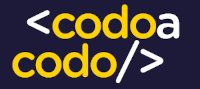

**Todos los derechos son reservados por el Programa Codo a
Codo perteneciente a la Subsecretaría Agencia de Aprendizaje
a lo largo de la vida del Ministerio de Educación del Gobierno
de la Ciudad Autónoma de Buenos Aires.
Se encuentra prohibida su venta o comercialización.**